# 2022-06-07 Compito A

Per questa parte d'esame potrete consultare **solo i seguenti siti Web**:

-  [Python](https://docs.python.org/3/)
-  [Numpy](https://numpy.org)
-  [Scipy](https://docs.scipy.org/)
-  [Pandas](https://pandas.pydata.org/)
-  [Scikit-Learn](https://scikit-learn.org/stable/)
-  [Matplotlib](https://matplotlib.org/)
-  [Seaborn](http://seaborn.pydata.org/)

In [1]:
# importare i package necessari in questa parte
# Scrivere qui il codice
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Problema: Classificazione (12 punti totali)

## Esercizio 1 (1 punto)

Caricare i dati contenuti nel file "dataset.csv" (comma separated value) che descrivono 1,000 istanze di alcune informazioni demografiche (14 in tutto) relative a cittadini di varie nazionalità e un'ulteriore variabile binaria che indica se lo stipendio annuo del cittadino è inferiore (-1) o superiore (+1) ai 50 mila dollari.
Esistono dei valori mancanti indicati con il simbolo "?".

In [2]:
# Scrivere qui il codice
DATAPATH = './dataset.csv'
data = pd.read_csv(DATAPATH, na_values='?', sep=',')
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_greater_than_50k
count,996.000000,1000,1.000000e+03,1000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,7,NaN,16,NaN,6,13,6,5,2,NaN,NaN,NaN,28,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,758,NaN,336,NaN,462,146,411,850,659,NaN,NaN,NaN,919,NaN
mean,38.745984,NaN,1.883942e+05,NaN,10.108000,NaN,NaN,NaN,NaN,NaN,1119.810000,86.988000,40.733000,NaN,-0.496000
std,13.451074,NaN,1.058661e+05,NaN,2.558688,NaN,NaN,NaN,NaN,NaN,6156.576929,396.191304,11.746987,NaN,0.868757
min,17.000000,NaN,1.930200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,NaN,-1.000000
25%,28.000000,NaN,1.220608e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,-1.000000
50%,37.000000,NaN,1.767335e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,-1.000000
75%,48.000000,NaN,2.312898e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,1.000000


## Esercizio 2 (2 punto)

### 2.1 (0.5 punti)
Con una sola riga di comando, mostrare quali sono le colonne che contangono valori nulli e quali no.

In [3]:
# Scrivere qui il codice
data.isnull().any()


age                         True
workclass                  False
fnlwgt                     False
education                  False
education_num              False
marital_status             False
occupation                 False
relationship               False
race                       False
sex                        False
capital_gain               False
capital_loss               False
hours_per_week             False
native_country             False
income_greater_than_50k    False
dtype: bool

### 2.2 (0.5 punti)
Sostituire i valori nulli con la mediana **solo** per la colonna (o le colonne) che contengono valori nulli

In [4]:
# Scrivere qui il codice
data.age = data.age.fillna(data.age.median())
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_greater_than_50k
count,1000.000000,1000,1.000000e+03,1000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,7,NaN,16,NaN,6,13,6,5,2,NaN,NaN,NaN,28,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,758,NaN,336,NaN,462,146,411,850,659,NaN,NaN,NaN,919,NaN
mean,38.739000,NaN,1.883942e+05,NaN,10.108000,NaN,NaN,NaN,NaN,NaN,1119.810000,86.988000,40.733000,NaN,-0.496000
std,13.424571,NaN,1.058661e+05,NaN,2.558688,NaN,NaN,NaN,NaN,NaN,6156.576929,396.191304,11.746987,NaN,0.868757
min,17.000000,NaN,1.930200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,NaN,-1.000000
25%,28.000000,NaN,1.220608e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,-1.000000
50%,37.000000,NaN,1.767335e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,-1.000000
75%,48.000000,NaN,2.312898e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,1.000000


### 2.3 (1 punto)
Modificare il tipo della colonna "age" in intero utilizzando il tipo numpy ***np.int32***.

**Nota**: è possibile utilizzare la seguente assegnazione:

<code>**data["column"] = data["column"].apply(np.datatype)**</code>

In [5]:
# Scrivere qui il codice
data['age'] = data['age'].apply(np.int32)

## Esercizio 4 (2 punti)

Implementare la funzione <code>**standardize_dataset**</code>, che prende in input un oggetto <code>**pandas.DataFrame**</code> e lo modifica creando **nuove** colonne corrispondenti ai valori **standardizzati** delle sole colonne di tipo _numerical_, ad eccezione dell'ultima colonna target <code>**income_greater_than_50k**</code>.
Per standardizzare una colonna $X$, ogni valore $x\in X$ deve essere modificato con $x_{\text{std}}$ come segue:

$$
x_{\text{std}} = \frac{x - \mu_X}{\sigma_X}
$$

dove $\mu_X$ e $\sigma_X$ sono la **media** e **deviazione standard** calcolate su $X$.

I nomi delle colonne standardizzate devono essere costruiti nel seguente modo: se il nome originale è <code>**column**</code>, quello della colonna standardizzata diventa <code>**column_std**</code>.

**Nota**: per essere sicuro che la standardizzazione venga applicata solo alle colonne numeriche, è possibile utilizzare la seguente funzione:

<code>**pd.api.types.infer_dtype(data[column], skipna=True)**</code>, che restituisce, nel nostro caso, <code>**'string'**</code> oppure <code>**'integer'**</code>.



In [6]:
def standardize_dataset(data):
    for column in data.columns:
        if pd.api.types.infer_dtype(data[column], skipna=True) == 'integer' and column != 'income_greater_than_50k':
            new_column = column + '_std'
            mean = data[column].mean()
            std = data[column].std()
            data[new_column] = (data[column] - mean) / std

## Esercizio 5 (1 punto)

Dopo aver fatto una copia del dataset <code>**data**</code> nella variabile <code>**data_cpy**</code>, applicare la funzione <code>**standardize_dataset**</code> su questa nuovva variabile e Fare un grafico con due subplot: un boxplot per la variabile <code>**hours_per_week**</code> e un boxplot per la variabile <code>**age**</code>.
Utilizzare il package seaborn per realizzare i boxplot.

Verificare visivamente se il numero di outlier è lo stesso oppure no. Scrivere nel box sotto il codice le vostre considerazioni per spiegare il comportamento osservato.


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

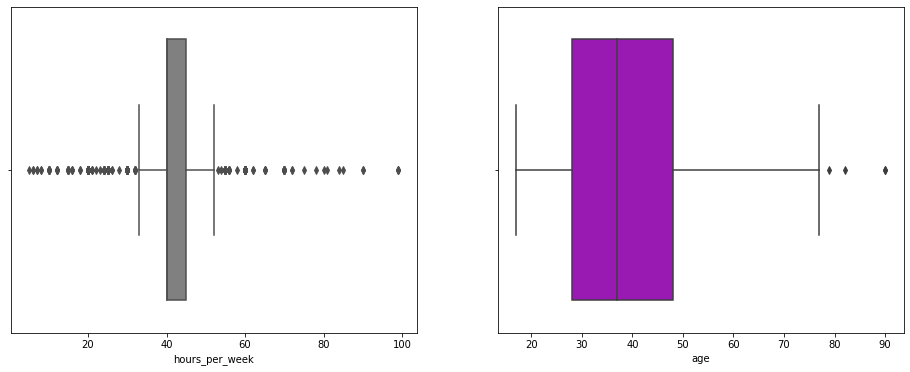

In [7]:
# Scrivere qui il codice
data_cpy = data.copy()
standardize_dataset(data_cpy)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data.hours_per_week, ax=axs[0], color='#808080')
sns.boxplot(data.age, ax=axs[1], color='#aa00cc')

In [8]:
'''
La colonna hours_per_week ha un numero di outliers più significativo della colonna age.
Inoltre, si osserva che sono di magnitudo più significativa, scostandosi di più dal range interquartile
Il numero di ore lavorative a settimana può variare molto a seconda del lavoro fatto e quindi presenta una varianza elevata.
Alla variabilità contribuisce la presenza di persone che non hanno l'età per lavorare, come i pensionati, e quindi si osservano
valori pari a 0 in hours_per_week, molto scostati dalla media.
Al contrario, l'età si concentra intorno alla media avendo una distribuzione simile a una distribuzione normale.
'''

"\nLa colonna hours_per_week ha un numero di outliers più significativo della colonna age.\nInoltre, si osserva che sono di magnitudo più significativa, scostandosi di più dal range interquartile\nIl numero di ore lavorative a settimana può variare molto a seconda del lavoro fatto e quindi presenta una varianza elevata.\nAlla variabilità contribuisce la presenza di persone che non hanno l'età per lavorare, come i pensionati, e quindi si osservano\nvalori pari a 0 in hours_per_week, molto scostati dalla media.\nAl contrario, l'età si concentra intorno alla media avendo una distribuzione simile a una distribuzione normale.\n"

## Esercizio 6 (punto 6)

In questo esercizio è richiesta l'implementazione della seguente machine learning pipeline:

1. Scegliere un modello di classificazione per la predizione della variabile target binaria (stipendio annuo superiore o inferiore a 50k). Utilizzare solo gli iperparametri di default.
2. Utilizzare un approccio di stratified K-fold cross validation (con K = 10). Ci sarà solo training e validation, non ci sarà la parte di test.
3. Scegliere o uk dataset originale o il dataset standardizzato. Scegliere una misura di performance.
4. Addestrare e validare un classificatore C1 solo sulle colonne numeriche. 
5. Addestrare e validare un altro classificatore C2 sulle colonne numeriche e almeno due colonne categoriche a scelta (utilizzando una one-hot encoding per le colonne categoriche).
6. Confrontare i valori delle performance sui K fold di validazione con un test wilcoxon. Verificare la significatività statistica del test (per p-value < 0.01).

In [13]:
# Scrivere qui il codice
C1 = LogisticRegression()
C2 = LogisticRegression()

k_fold = StratifiedKFold(n_splits=10, shuffle=True)

numeric_cols = [col for col in data_cpy.columns if (is_numeric_dtype(data_cpy[col]) and col[-4:] == '_std') or
                                                    col == 'income_greater_than_50k']
numeric_cols.insert(len(numeric_cols),
                    numeric_cols.pop(numeric_cols.index('income_greater_than_50k')))
categorical_cols = ['workclass', 'relationship', 'education']
c2_cols = numeric_cols + categorical_cols
c2_cols.insert(len(c2_cols),
               c2_cols.pop(c2_cols.index('income_greater_than_50k')))

datac1 = data_cpy.loc[:, numeric_cols]
datac2 = data_cpy.loc[:, c2_cols]
X1 = datac1.iloc[:, :-1]
y1 = datac1.income_greater_than_50k
X2 = datac2.iloc[:, :-1]
X2 = pd.get_dummies(X2)
y2 = datac2.income_greater_than_50k

C1.fit(X1, y1)
C1_score = cross_val_score(C1, X1, y1, cv=k_fold, scoring='accuracy')
C2.fit(X2, y2)
C2_score = cross_val_score(C2, X2, y2, cv=k_fold, scoring='accuracy')

pvalue = stats.wilcoxon(C1_score, C2_score).pvalue
if pvalue > 0.01:
    print(f"Le due performance derivano probabilmente da modelli simili, con p-value pari a {pvalue}")
else:
    print(f"Le due performance derivano probabilmente da modelli diversi, con p-value pari a {pvalue}")


Le due performance derivano probabilmente da modelli simili, con p-value pari a 0.7215797250891103


/home/lorenzo/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/lorenzo/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
